<a href="https://colab.research.google.com/github/InowaR/colab/blob/main/ai_bug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import os
from google.colab import userdata

os.environ['GOOGLE_API_KEY'] = userdata.get('GOOGLE_API_KEY')

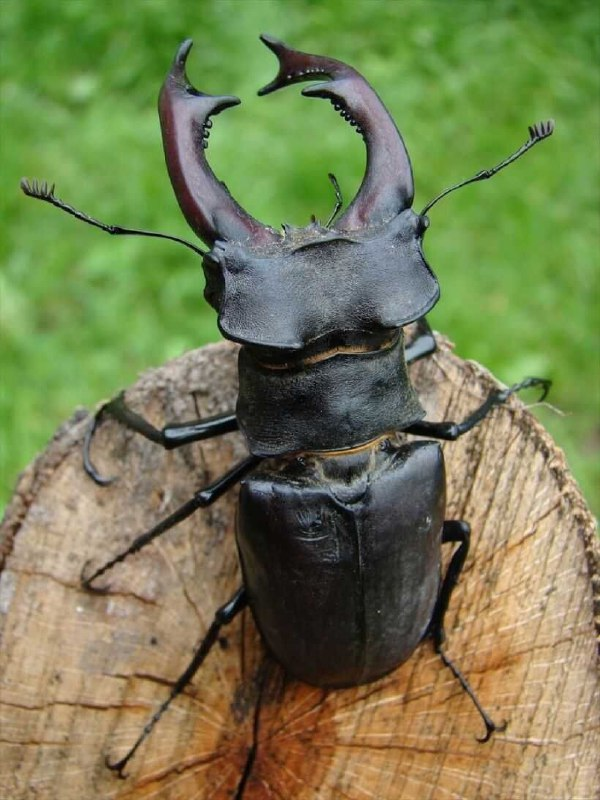

In [77]:
import PIL.Image

img = PIL.Image.open('image.jpg')
img

In [78]:
import subprocess
import socket
import json
import re

bash_command = """echo '{
  "contents":[
    {
      "parts":[
        {"text": "Привет, ты видишь жука на фотографии? Если да, напиши on, если нет, напиши off. Напиши ответ без комментариев и без любых символов включая символ новой строки."},
        {
          "inline_data": {
            "mime_type":"image/jpeg",
            "data": "'$(base64 -w0 image.jpg)'"
          }
        }
      ]
    }
  ]
}' > request.json

curl https://generativelanguage.googleapis.com/v1beta/models/gemini-1.5-flash:generateContent?key=${GOOGLE_API_KEY} \
        -H 'Content-Type: application/json' \
        -d @request.json 2> /dev/null
"""

process = subprocess.Popen(bash_command, shell=True, stdout=subprocess.PIPE)
output, _ = process.communicate()
result = output.decode('utf-8')

data = json.loads(output)

command = data["candidates"][0]["content"]["parts"][0]["text"]

pattern = r"\W+"
command = re.sub(pattern, "", command).lower()
print(command)

# host = '192.168.43.56'
# port = 80

# try:
#     s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
#     s.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR, 1)
#     s.settimeout(5)
#     s.connect((host, port))

#     if command == 'on':
#         s.send(b'on')
#     elif command == 'off':
#         s.send(b'off')
#     elif command == 'q':
#         s.send(b'q')
#     else:
#         print('Нет такой команды')

#     response = s.recv(1024)
#     print(response.decode())

# except Exception as e:
#     print("Error:", e)

# finally:
#     print("Выход")

on
